# Looking at the relationship between depression and alcohol consumption in different countries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

In [ ]:
# Import the data

depression = pd.read_csv('../DATA/mini_project_1_depressive-disorders-prevalence-males-vs-females.csv')
alcohol = pd.read_csv('../DATA/mini_project_1_OECD_Alcohol_Consumption_per_Capita.csv')

In [ ]:
depression.columns

In [ ]:
depression = depression.rename(columns={'Depressive disorders (share of population) - Sex: Male - Age: Age-standardized': 'depression_male',
                                        'Depressive disorders (share of population) - Sex: Female - Age: Age-standardized':'depression_female',
                                        'Population (historical estimates)':'population_estimates'})

In [ ]:
depression.shape

In [ ]:
depression.dtypes


In [ ]:
depression.head()

In [ ]:
depression.tail()

## Data keys

- Entity = Country
- Code = Country code
- Year = Year
- Depressive disorders (share of population) - sex Male - age, age standardised (???)
- Depressive disorders (share of population) - sex Female - age, age standardised (???)
- Population historical estimate 
- Continent

In [ ]:
depression.isna().sum()

In [ ]:
depression.groupby(by='Entity').value_counts()

Maybe be more specific 
- specific year
- specific gender
- specific continent

In [ ]:
depression[depression['Continent'] == 'Europe']['Year'].unique()

In [ ]:
depression[depression['Year'] == 2015].groupby(by = 'Continent').count()

In [ ]:
depression[depression['Continent'] == 'Oceania']

In [ ]:
depression[depression['Entity'] == 'New Zealand'].groupby(by='Continent').count()

1. Extract the country by year 2015.
2. For each record, if the name of the country is the same, and if the continent is NA, fill it with country continent from year 2015. 

In [ ]:
country_continent_df = depression[depression['Year'] == 2015][['Entity', 'Continent']]

In [ ]:
country_continent_df[country_continent_df['Continent'].isna() == True]

In [ ]:
# These are not countries. There are High-income countries, upper middle, lower middle, low income countries.
# I should probably drop these. 

In [ ]:
alcohol.info()

In [ ]:
alcohol.head()

In [ ]:
alcohol.tail()

In [ ]:
alcohol['FREQUENCY'].unique()

In [ ]:
alcohol['LOCATION'].unique()

In [ ]:
alcohol_country = alcohol['LOCATION'].unique().tolist()

In [ ]:
alcohol_country

In [ ]:
depression[depression['Code'] == 'AUS']

In [ ]:
test = ['AUS','ROU']

In [ ]:
depression[depression['Code'].isin(alcohol_country)]['Code'].sort_values().unique()

Oceania - AUS
Europe - AUT, BEL, BGR, CHE, CZE
South America - ARG',BRA, CHL, COL
North America - CAN, CRI, 
Asia - CHN



 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL',
       'CHN', 'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN',
       'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'ISL',
       'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD',
       'NOR', 'NZL', 'PER', 'POL', 'PRT', 'ROU', 'RUS', 'SVK', 'SVN',
       'SWE', 'TUR', 'USA', 'ZAF'], dtype=object)

Depression['Code'] is the same as alcohol['Location'].
Depression['Year'] is the same as alcohol['Time].

Alcohol - I can drop the frequency.

In [ ]:
alcohol['TIME'].unique()

In [ ]:
subset_df = alcohol[(alcohol['TIME'].isin([1980,1990,2000,2010,2018])) & (alcohol['LOCATION'].isin(['AUS','FRA','CAN','CHN','IND','JPN','RUS','TUR']))]
sns.lineplot(x='TIME', y='LITRES/CAPITA', data = subset_df, hue='LOCATION')

In [ ]:
depression.head()

In [ ]:
#subset_df_2 = depression[(depression['Year'].isin([1980,1990,2000,2010])) & (depression['Code'].isin(['AUS','CAN','CHN','IND','JPN']))]
subset_df_2 = depression[depression['Code'].isin(['AUS','CAN','CHN','IND','JPN','RUS','THA','FRA'])]

sns.lineplot(x='Year', y='depression_male', data = subset_df_2, hue='Code')

In [ ]:
depression[(depression['Code'].isin(['AUS','CAN','CHN','IND','JPN'])) & (depression['depression_female'].isna())]

In [ ]:
subset_df_2 = depression[depression['Code'].isin(['AUS','CAN','CHN','IND','JPN','THA'])]

sns.lineplot(x='Year', y='depression_female', data = subset_df_2, hue='Code')

In [ ]:
injury = pd.read_csv('../DATA/mini_project1_IHME-GBD_2019_DATA-e11478df-1.csv')

In [ ]:
injury.head()

In [ ]:
depression_new = pd.read_csv('../DATA/mini_project_new_depression_data.csv')

In [ ]:
depression_new.head()

In [ ]:
depression_new.isna().sum()

In [ ]:
depression_new.info()

In [ ]:
depression_new.describe()

In [ ]:
alcohol['country_name'] = alcohol['LOCATION']

In [ ]:
depression_incident = pd.read_csv('../DATA/mini_project1_depression_incident_1990_2019.csv')

In [ ]:
depression_incident.head()

In [ ]:
dp_rate = depression_incident[depression_incident['metric'] == 'Rate'][['location','year','val']]


In [ ]:
subset_location = ['Australia']
sns.lineplot(data = dp_rate[dp_rate['location'].isin(subset_location)], x='year', y='val', hue='location')


In [ ]:
sns.lineplot(x='TIME', y='LITRES/CAPITA', data = alcohol[(alcohol['LOCATION'] == 'AUS') & (alcohol['TIME'] >= 1990)], hue='LOCATION')

In [ ]:
depression_incident[depression_incident['metric'] == 'Rate'].groupby(by=['location','year']).mean()


In [ ]:
sns.lineplot(x='year', y='val', data = dp_rate)

In [ ]:
plt.hist(x=dp_rate['val'])

In [ ]:
sns.histplot(data=dp_rate, x='val')

In [ ]:
dp_rate['country_code'] = dp_rate['location'].

In [ ]:
countries={}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3

countries

In [ ]:
dp_rate['location_code'] = [countries.get(country, 'Unknown code') for country in dp_rate['location']]

In [ ]:
dp_rate.head()

In [ ]:
alcohol.head()

In [ ]:
print(dp_rate.shape)
print(alcohol.shape)

In [ ]:
dp_alcohol = pd.merge(dp_rate,alcohol, how='inner', left_on=['location_code','year'], right_on=['LOCATION','TIME'])

In [ ]:
dp_alcohol.shape

In [ ]:
dp_alcohol.head()

Financial crisis happens in 2008. Let's see if the depression has increased between 2007 and 2008 and if the alcohol consumption also increased during that time. 

In [ ]:
interest_year = [2007,2008]
subset = dp_alcohol[dp_alcohol['year'].isin(interest_year)]
plt.hist(subset[subset['year'] == 2007]['LITRES/CAPITA'], histtype='step', stacked=True, color='Blue')
plt.hist(subset[subset['year'] == 2008]['LITRES/CAPITA'], histtype='step', stacked=True, color='Red')

plt.show()

In [ ]:
sns.scatterplot(data=dp_alcohol[dp_alcohol['year'] == 2008], x='LITRES/CAPITA', y='val')

In [ ]:
dp_alcohol[dp_alcohol['year'] == 2008][['LITRES/CAPITA','val']].corr()

In [ ]:
dp_alcohol_2019 = dp_alcohol[dp_alcohol['year'] == 2019]

In [ ]:
dp_alcohol_2019.head()

In [ ]:
dp_alcohol_2019.shape

In [ ]:
low_alcohol = dp_alcohol_2019.sort_values(by='LITRES/CAPITA').iloc[1:11]['val'].tolist()


In [ ]:
low_alcohol

In [ ]:
high_alcohol = dp_alcohol_2019.sort_values(by='LITRES/CAPITA').iloc[34:44]['val'].tolist()

In [ ]:
high_alcohol

In [ ]:
plt.boxplot(x=[low_alcohol,high_alcohol])

In [ ]:
alcohol_abuse = pd.read_csv('../DATA/mini_project1_alcohol_abuse_depression_disorder.csv')

In [ ]:
alcohol_abuse.head()

In [ ]:
alcohol_abuse.cause.unique()

In [ ]:
alcohol_abuse[alcohol_abuse['cause'] == 'Alcohol use disorders']

In [ ]:
al = alcohol_abuse[alcohol_abuse['cause'] == 'Alcohol use disorders']
dp = alcohol_abuse[alcohol_abuse['cause'] == 'Depressive disorders']
dp_al_merge = pd.merge(al,dp, how='inner', left_on=['location','year'], right_on=['location','year'], left_index=False, right_index=False)

In [ ]:
dp_al_merge.head()

In [ ]:
dp_al_merge = dp_al_merge[['location','year','val_x','val_y']]

In [ ]:
dp_al_merge.rename(columns={'val_x':'alcohol_abuse', 'val_y':'depression_disorders'}, inplace=True)

In [ ]:
dp_al_merge.head()

In [ ]:
sns.scatterplot(data=dp_al_merge, x='alcohol_abuse', y='depression_disorders', hue='location')

In [ ]:
dp_al_merge[['alcohol_abuse','depression_disorders']].corr()

In [ ]:
dp_al_merge['location'].sort_values().unique()

In [ ]:
south_american = ['Argentina', 'Brazil', 'Chile','Colombia','Peru','Mexico']
dpal_sa = dp_al_merge[dp_al_merge['location'].isin(south_american)]

In [ ]:
dpal_sa['location'].sort_values().unique()

In [ ]:
sns.scatterplot(data=dpal_sa, x='alcohol_abuse', y='depression_disorders', hue='location')

In [ ]:
sns.lineplot(data=dpal_sa, x='year', y='depression_disorders', hue='location')

In [ ]:
sns.lineplot(data=dpal_sa, x='year', y='alcohol_abuse', hue='location')

In [ ]:
sns.lineplot(data=dp_al_merge[dp_al_merge['location'] == 'Australia'], x='year', y='depression_disorders', hue='location')

In [ ]:
sns.lineplot(data=dp_al_merge[dp_al_merge['location'] == 'Australia'], x='year', y='alcohol_abuse', hue='location')

Story
- Regardless of each year, it seems that the depression incident and the alcohol abuse disorder are distinct between countries with high income and low income in world bank. 
- Average of accident per year is different.

In [180]:
df = pd.read_csv('../DATA/mini_project_1_all_countries_mental_disorder.csv')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   measure   204 non-null    object 
 1   location  204 non-null    object 
 2   sex       204 non-null    object 
 3   age       204 non-null    object 
 4   cause     204 non-null    object 
 5   metric    204 non-null    object 
 6   year      204 non-null    int64  
 7   val       204 non-null    float64
 8   upper     204 non-null    float64
 9   lower     204 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 16.1+ KB


In [187]:
df.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Incidence,Uzbekistan,Both,All ages,Mental disorders,Rate,2019,3846.365157,4395.702467,3361.639801
1,Incidence,Lao People's Democratic Republic,Both,All ages,Mental disorders,Rate,2019,3342.876636,3789.064064,2938.416575
2,Incidence,Mongolia,Both,All ages,Mental disorders,Rate,2019,5080.060998,5818.087955,4392.068001
3,Incidence,Timor-Leste,Both,All ages,Mental disorders,Rate,2019,3187.512271,3623.402717,2816.051310
4,Incidence,Kiribati,Both,All ages,Mental disorders,Rate,2019,3476.829239,3961.415708,3050.081363


In [188]:
# Generate the country code in dp_rate
countries={}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3

df['location_code'] = [countries.get(country, 'Unknown code') for country in df['location']]

In [189]:
df['location_code'].head()

0    UZB
1    LAO
2    MNG
3    TLS
4    KIR
Name: location_code, dtype: object

In [190]:
df.isna().sum()

measure          0
location         0
sex              0
age              0
cause            0
metric           0
year             0
val              0
upper            0
lower            0
location_code    0
dtype: int64

In [184]:
country_list = pd.read_csv('../DATA/mini_project_1_country_income_list.csv')

In [185]:
country_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Economy           218 non-null    object
 1   Code              218 non-null    object
 2   Region            218 non-null    object
 3   Income group      217 non-null    object
 4   Lending category  144 non-null    object
dtypes: object(5)
memory usage: 8.6+ KB


In [186]:
country_list.head()

,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [191]:
dfm = pd.merge(df,country_list,how='inner',left_on='location_code', right_on='Code')

In [192]:
dfm.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower,location_code,Economy,Code,Region,Income group,Lending category
0,Incidence,Uzbekistan,Both,All ages,Mental disorders,Rate,2019,3846.365157,4395.702467,3361.639801,UZB,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,Blend
1,Incidence,Lao People's Democratic Republic,Both,All ages,Mental disorders,Rate,2019,3342.876636,3789.064064,2938.416575,LAO,Lao PDR,LAO,East Asia & Pacific,Lower middle income,IDA
2,Incidence,Mongolia,Both,All ages,Mental disorders,Rate,2019,5080.060998,5818.087955,4392.068001,MNG,Mongolia,MNG,East Asia & Pacific,Lower middle income,IBRD
3,Incidence,Timor-Leste,Both,All ages,Mental disorders,Rate,2019,3187.512271,3623.402717,2816.051310,TLS,Timor-Leste,TLS,East Asia & Pacific,Lower middle income,Blend
4,Incidence,Kiribati,Both,All ages,Mental disorders,Rate,2019,3476.829239,3961.415708,3050.081363,KIR,Kiribati,KIR,East Asia & Pacific,Lower middle income,IDA


In [193]:
dfm.shape

(187, 16)

<Axes: xlabel='val', ylabel='Density'>

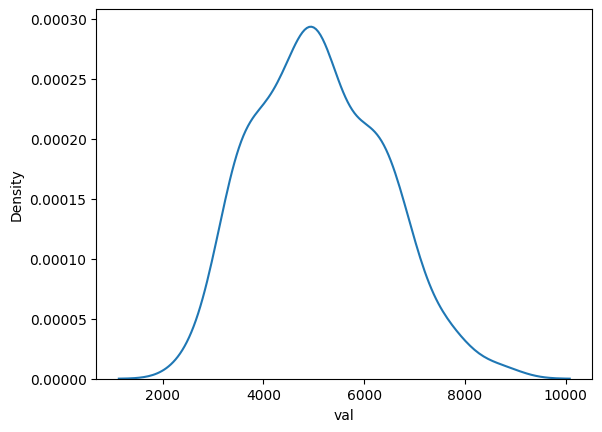

In [221]:
sns.kdeplot(dfm['val'])

<Axes: xlabel='Income group', ylabel='val'>

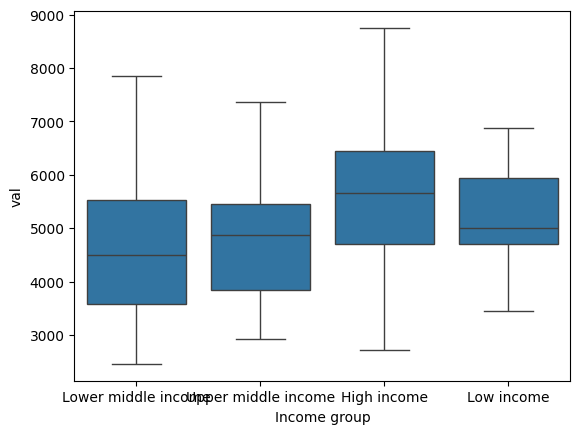

In [194]:
sns.boxplot(data=dfm, x='Income group', y='val')

In [195]:
from scipy.stats import f_oneway

In [197]:

fvalue, pvalue = f_oneway(dfm[dfm['Income group'] == 'Low income']['val'],
         dfm[dfm['Income group'] == 'Lower middle income']['val'],
         dfm[dfm['Income group'] == 'Upper middle income']['val'],
         dfm[dfm['Income group'] == 'High income']['val'])

print(fvalue, pvalue)

4.833750284177271 0.0029144854994634967


In [202]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [203]:
tukey = pairwise_tukeyhsd(endog=dfm['val'], groups=dfm['Income group'], alpha=0.05)

In [204]:
print(tukey)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1              group2        meandiff p-adj    lower      upper   reject
------------------------------------------------------------------------------------
        High income          Low income -375.0926 0.5777 -1135.6929  385.5077  False
        High income Lower middle income -783.6521 0.0048 -1384.2125 -183.0917   True
        High income Upper middle income -704.2618 0.0143 -1304.8222 -103.7014   True
         Low income Lower middle income -408.5595 0.5354 -1195.9641  378.8452  False
         Low income Upper middle income -329.1692 0.6998 -1116.5738  458.2355  False
Lower middle income Upper middle income   79.3903 0.9882  -554.7754   713.556  False
------------------------------------------------------------------------------------


In [212]:
from scipy import stats

In [213]:
fitted_data, ax = stats.boxcox(dfm['val'])

/var/folders/cj/rzmp7kfn4jg08km6g547jdsjk73ykr/T/ipykernel_2784/3451681922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfm['val'], hist=False, kde=True, color='green', label = 'original')


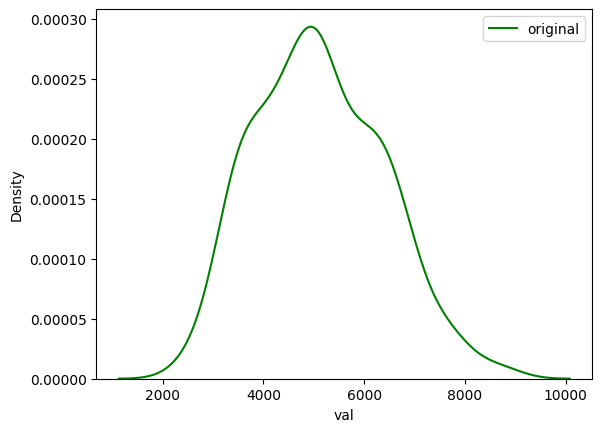

In [216]:
sns.distplot(dfm['val'], hist=False, kde=True, color='green', label = 'original')
#sns.distplot(fitted_data, hist=False, kde=True, color='red', label='transformed')
plt.legend(loc='upper right')
plt.show()

# 2009 data 

The reason for this data is because there is a financial crisis in 2008. 

In [224]:
df = pd.read_csv('../DATA/mini_project_1_mental_disorder_cases_2009.csv')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   measure   204 non-null    object 
 1   location  204 non-null    object 
 2   sex       204 non-null    object 
 3   age       204 non-null    object 
 4   cause     204 non-null    object 
 5   metric    204 non-null    object 
 6   year      204 non-null    int64  
 7   val       204 non-null    float64
 8   upper     204 non-null    float64
 9   lower     204 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 16.1+ KB


In [227]:
income = pd.read_csv('../DATA/mini_project_1_country_list_GNI_2009.csv')

In [228]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location_code  218 non-null    object
 1   location       218 non-null    object
 2   income_group   218 non-null    object
dtypes: object(3)
memory usage: 5.2+ KB


In [229]:
# Generate the country code in dp_rate
countries={}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3

df['location_code'] = [countries.get(country, 'Unknown code') for country in df['location']]

In [230]:
df.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower,location_code
0,Incidence,Bulgaria,Both,All ages,Mental disorders,Rate,2009,4291.890608,4844.300911,3820.579850,BGR
1,Incidence,Mongolia,Both,All ages,Mental disorders,Rate,2009,5135.432719,5879.411826,4479.589633,MNG
2,Incidence,Papua New Guinea,Both,All ages,Mental disorders,Rate,2009,3615.466532,4133.272594,3160.893563,PNG
3,Incidence,Kiribati,Both,All ages,Mental disorders,Rate,2009,3465.941231,3954.705318,3042.425565,KIR
4,Incidence,Timor-Leste,Both,All ages,Mental disorders,Rate,2009,3045.165610,3400.973949,2724.584347,TLS


In [232]:
df.rename(columns={'val':'mental_disorder_rate'}, inplace=True)

In [233]:
df_merge = pd.merge(df,income,how='inner',left_on='location_code', right_on='location_code')

In [234]:
df_merge.shape

(187, 13)

In [235]:
df_merge.head()

,measure,location_x,sex,age,cause,metric,year,mental_disorder_rate,upper,lower,location_code,location_y,income_group
0,Incidence,Bulgaria,Both,All ages,Mental disorders,Rate,2009,4291.890608,4844.300911,3820.579850,BGR,Bulgaria,UM
1,Incidence,Mongolia,Both,All ages,Mental disorders,Rate,2009,5135.432719,5879.411826,4479.589633,MNG,Mongolia,LM
2,Incidence,Papua New Guinea,Both,All ages,Mental disorders,Rate,2009,3615.466532,4133.272594,3160.893563,PNG,Papua New Guinea,LM
3,Incidence,Kiribati,Both,All ages,Mental disorders,Rate,2009,3465.941231,3954.705318,3042.425565,KIR,Kiribati,LM
4,Incidence,Timor-Leste,Both,All ages,Mental disorders,Rate,2009,3045.165610,3400.973949,2724.584347,TLS,Timor-Leste,LM


In [239]:
df_merge.isna().sum()

measure                 0
location_x              0
sex                     0
age                     0
cause                   0
metric                  0
year                    0
mental_disorder_rate    0
upper                   0
lower                   0
location_code           0
location_y              0
income_group            0
dtype: int64

In [240]:
df_merge[df_merge['income_group'] == '..']

,measure,location_x,sex,age,cause,metric,year,mental_disorder_rate,upper,lower,location_code,location_y,income_group
172,Incidence,Nauru,Both,All ages,Mental disorders,Rate,2009,3613.104011,4286.546442,3043.957850,NRU,Nauru,..
184,Incidence,South Sudan,Both,All ages,Mental disorders,Rate,2009,4736.297594,5388.901291,4149.550057,SSD,South Sudan,..


In [241]:
df_merge = df_merge[df_merge['income_group'] != '..']

In [242]:
df_merge.head()

,measure,location_x,sex,age,cause,metric,year,mental_disorder_rate,upper,lower,location_code,location_y,income_group
0,Incidence,Bulgaria,Both,All ages,Mental disorders,Rate,2009,4291.890608,4844.300911,3820.579850,BGR,Bulgaria,UM
1,Incidence,Mongolia,Both,All ages,Mental disorders,Rate,2009,5135.432719,5879.411826,4479.589633,MNG,Mongolia,LM
2,Incidence,Papua New Guinea,Both,All ages,Mental disorders,Rate,2009,3615.466532,4133.272594,3160.893563,PNG,Papua New Guinea,LM
3,Incidence,Kiribati,Both,All ages,Mental disorders,Rate,2009,3465.941231,3954.705318,3042.425565,KIR,Kiribati,LM
4,Incidence,Timor-Leste,Both,All ages,Mental disorders,Rate,2009,3045.165610,3400.973949,2724.584347,TLS,Timor-Leste,LM


In [243]:
df_merge.shape

(185, 13)

<Axes: xlabel='mental_disorder_rate', ylabel='Density'>

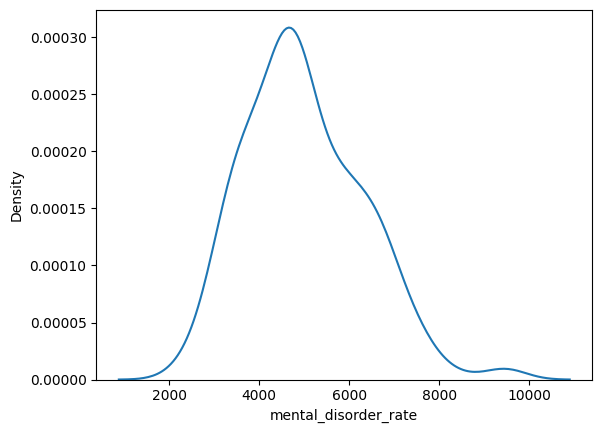

In [244]:
sns.kdeplot(df_merge['mental_disorder_rate'])

<Axes: xlabel='income_group', ylabel='mental_disorder_rate'>

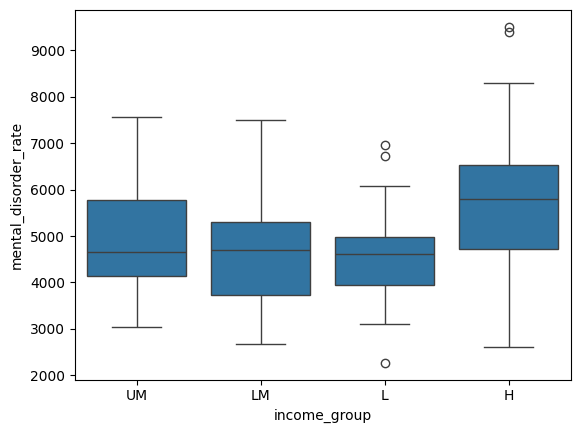

In [245]:
sns.boxplot(data=df_merge, x='income_group', y='mental_disorder_rate')

In [247]:
fvalue, pvalue = f_oneway(df_merge[df_merge['income_group'] == 'L']['log_transform'],
         df_merge[df_merge['income_group'] == 'LM']['log_transform'],
         df_merge[df_merge['income_group'] == 'UM']['log_transform'],
         df_merge[df_merge['income_group'] == 'H']['log_transform'],)

print(fvalue, pvalue)

7.984614703380496 4.993541068951013e-05


In [248]:
tukey = pairwise_tukeyhsd(endog=df_merge['mental_disorder_rate'], groups=df_merge['income_group'], alpha=0.05)

In [249]:
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     H      L -1119.1689 0.0002 -1810.3982 -427.9397   True
     H     LM -1002.8149 0.0003 -1635.7122 -369.9175   True
     H     UM  -735.1929 0.0218 -1393.2465  -77.1394   True
     L     LM   116.3541 0.9727  -580.4249   813.133  False
     L     UM    383.976 0.5113  -335.7297 1103.6818  False
    LM     UM    267.622  0.723  -396.2587  931.5026  False
-----------------------------------------------------------


In [250]:
#Dataset for working age
df = pd.read_csv('../DATA/mini_project_1_mental_disorder_2009_working_age.csv')

In [251]:
df.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Incidence,Cambodia,Both,20-24 years,Mental disorders,Rate,2009,4943.133082,6489.329427,3643.465356
1,Incidence,Cambodia,Both,25-29 years,Mental disorders,Rate,2009,4282.619817,5623.525453,3338.313651
2,Incidence,Cambodia,Both,30-34 years,Mental disorders,Rate,2009,4040.878366,5256.738445,3157.432072
3,Incidence,Cambodia,Both,35-39 years,Mental disorders,Rate,2009,4231.838195,5333.323483,3306.022971
4,Incidence,Cambodia,Both,40-44 years,Mental disorders,Rate,2009,4363.024367,5568.770433,3315.198252


In [260]:
df_a = pd.DataFrame(df.groupby(by='location')['val'].mean('val')).reset_index()

In [263]:
df_a['location']

0                             Afghanistan
1                                 Albania
2                                 Algeria
3                          American Samoa
4                                 Andorra
                      ...                
199    Venezuela (Bolivarian Republic of)
200                              Viet Nam
201                                 Yemen
202                                Zambia
203                              Zimbabwe
Name: location, Length: 204, dtype: object

In [264]:
# Generate the country code in df
countries={}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3

df_a['location_code'] = [countries.get(country, 'Unknown code') for country in df_a['location']]

In [265]:
df_a

,location,val,location_code
0,Afghanistan,9573.608160,AFG
1,Albania,3699.144534,ALB
2,Algeria,7390.548274,DZA
3,American Samoa,3578.759956,ASM
4,Andorra,6177.467559,AND
...,...,...,...
199,Venezuela (Bolivarian Republic of),5810.770540,Unknown code
200,Viet Nam,3180.469318,VNM
201,Yemen,9406.346378,YEM
202,Zambia,6546.087903,ZMB


<Axes: xlabel='val', ylabel='Density'>

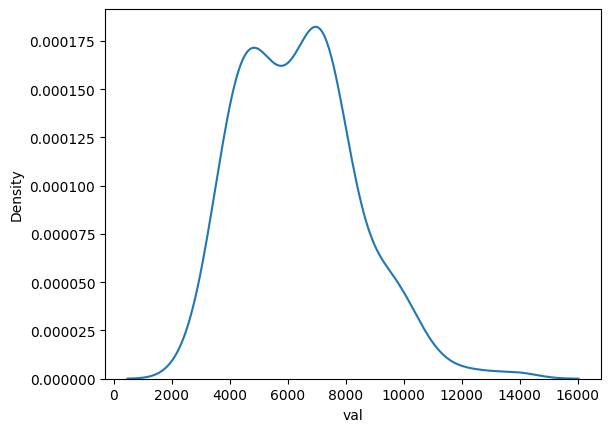

In [266]:
sns.kdeplot(df_a['val'])

In [267]:
fix_country = {'10':'PRK',
               '27':'FSM',
               '28':'TWN',
               '62':'KOR',
               '66':'MDA',
               '95':'USA',
               '107':'BOL',
               '119':'PSE',
               '121':'IRN',
               '129':'TUR',
               '130':'VEN',
               '141':'TZA',
               '153':'COD',
               '195':'VIR'}

for key, country in fix_country.items():
    if df_a.loc[int(key), 'location_code'] == 'Unknown code':
        df_a.loc[int(key),'location_code'] = country
    #print(key, country)

In [268]:
#Merge #plot
df_merge = pd.merge(df_a,income,how='left',left_on='location_code', right_on='location_code')

/var/folders/cj/rzmp7kfn4jg08km6g547jdsjk73ykr/T/ipykernel_2784/3392349130.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Low','Lower-Medium','Uper-Medium','High'])


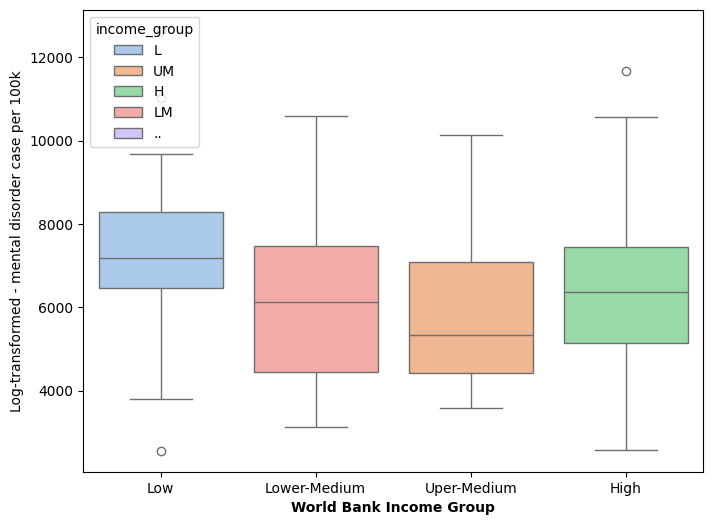

In [269]:
fig, axes = plt.subplots(figsize=(8,6))
#sns.set(font_scale=1)
ax = sns.boxplot(data=df_merge, x='income_group', y='val', hue='income_group', order=['L','LM','UM','H'], palette='pastel')
ax.set_xticklabels(['Low','Lower-Medium','Uper-Medium','High'])
ax.set_xlabel('World Bank Income Group', fontdict=dict(weight='bold'))
ax.set_ylabel('Log-transformed - mental disorder case per 100k')
plt.savefig('image_2_boxplot.png')

In [273]:
df_merge.head()

,location_x,val,location_code,location_y,income_group
0,Afghanistan,9573.608160,AFG,Afghanistan,L
1,Albania,3699.144534,ALB,Albania,UM
2,Algeria,7390.548274,DZA,Algeria,UM
3,American Samoa,3578.759956,ASM,American Samoa,UM
4,Andorra,6177.467559,AND,Andorra,H


In [274]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_x     204 non-null    object 
 1   val            204 non-null    float64
 2   location_code  204 non-null    object 
 3   location_y     188 non-null    object 
 4   income_group   188 non-null    object 
dtypes: float64(1), object(4)
memory usage: 8.1+ KB


In [281]:
df_merge.dropna(axis=0, inplace=True)

In [283]:
df_merge.shape

(188, 5)

In [286]:
df_merge = df_merge[df_merge['income_group'] != '..']

In [287]:
fvalue, pvalue = f_oneway(df_merge[df_merge['income_group'] == 'L']['val'],
         df_merge[df_merge['income_group'] == 'LM']['val'],
         df_merge[df_merge['income_group'] == 'UM']['val'],
         df_merge[df_merge['income_group'] == 'H']['val'],)

print(fvalue, pvalue)

3.5530754923576806 0.01554721924714565


In [288]:
df_merge['income_group'].unique()

array(['L', 'UM', 'H', 'LM'], dtype=object)

In [289]:
tukey = pairwise_tukeyhsd(endog=df_merge['val'], groups=df_merge['income_group'], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     H      L   745.8573 0.2559  -302.5383 1794.2528  False
     H     LM  -183.1082 0.9601 -1142.3208  776.1044  False
     H     UM  -609.8154 0.3898 -1607.4972  387.8663  False
     L     LM  -928.9655 0.1088 -1989.8243  131.8934  False
     L     UM -1355.6727 0.0085 -2451.4379 -259.9075   True
    LM     UM  -426.7072 0.6933 -1437.4778  584.0633  False
-----------------------------------------------------------
